# YOLO3を使用して寿司の物体検出をする

・(320, 320)にリサイズした画像</br>
・アノテーションしたテキストを用意</br>
事前にkeras-yolo3を使用できるようにしておく。

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
%cd  drive/My Drive/project_sushi/keras-yolo3

/content/drive/My Drive/project_sushi/keras-yolo3


###自前データで学習<br>
####keras-yolo3/train.pyを編集<br>
```
annotation_path = '../annotation_resize.txt'
classes_path = '../labelImg/data/predefined_classes.txt'
input_shape = (320,320) 
```

In [0]:
#確認
!cat train.py

"""
Retrain the YOLO model for your own dataset.
"""

import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data


def _main():
    annotation_path = '../annotation_resize.txt'
    log_dir = 'logs/000/'
    classes_path = '../labelImg/data/predefined_classes.txt'
    anchors_path = 'model_data/yolo_anchors.txt'
    class_names = get_classes(classes_path)
    num_classes = len(class_names)
    anchors = get_anchors(anchors_path)

    input_shape = (320,320) # multiple of 32, hw

    is_tiny_version = len(anchors)==6 # default setting
    if is_tiny_version:
        model = create_tiny_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/tiny_yolo_

In [0]:
#学習
!python3 train.py

Using TensorFlow backend.
W0618 14:21:08.030790 139779087677312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0618 14:21:08.031187 139779087677312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0618 14:21:08.067797 139779087677312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 14:21:08.068064 139779087677312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.

### 学習したモデルを使用して物体検出をする
#### yolo.pyを編集
```
"model_path": 'logs/000/trained_weights_stage_1.h5',
"anchors_path": 'model_data/yolo_anchors.txt',
"classes_path": '../labelImg/data/predefined_classes.txt',
"model_image_size" : (320, 320),
```

In [0]:
#確認
!cat yolo.py

# -*- coding: utf-8 -*-
"""
Class definition of YOLO_v3 style detection model on image and video
"""

import colorsys
import os
from timeit import default_timer as timer

import numpy as np
from keras import backend as K
from keras.models import load_model
from keras.layers import Input
from PIL import Image, ImageFont, ImageDraw

from yolo3.model import yolo_eval, yolo_body, tiny_yolo_body
from yolo3.utils import letterbox_image
import os
from keras.utils import multi_gpu_model

class YOLO(object):
    _defaults = {
        "model_path": 'logs/000/trained_weights_final.h5',
        "anchors_path": 'model_data/yolo_anchors.txt',
        "classes_path": '../labelImg/data/predefined_classes.txt',
        "score" : 0.3,
        "iou" : 0.45,
        "model_image_size" : (320, 320),
        "gpu_num" : 1,
    }

    @classmethod
    def get_defaults(cls, n):
        if n in cls._defaults:
            return cls._defaults[n]
        else:
            return "Unrecognized attribute name '" +

In [0]:
!python3 yolo_video.py --image

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,
W0618 14:43:36.643421 139743442257792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0618 14:43:36.643773 139743442257792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0618 14:43:36.643935 139743442257792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2019-06-18 14:43:36.658714: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-06-18 14:43:36.658941: I tensorflow/compiler/xla/servi

### 出力された画像を確認

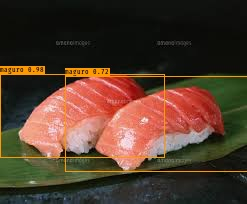

In [0]:
from IPython.display import Image,display_jpeg
display_jpeg(Image('out.jpg'))

検出されてますね